**Источники, которыми вдохновлялся:**
1) https://machinelearningmastery.com/how-to-implement-multi-head-attention-from-scratch-in-tensorflow-and-keras/

2) https://medium.com/@VectorWorksAcademy/building-a-multi-head-attention-with-pytorch-from-scratch-a-simple-yet-detailed-explanation-e000e4b84c0a

3) https://kazemnejad.com/blog/transformer_architecture_positional_encoding/

4) https://discuss.pytorch.org/t/how-to-modify-the-positional-encoding-in-torch-nn-transformer/104308/2
https://stackoverflow.com/questions/77444485/using-positional-encoding-in-pytorch

5) https://medium.com/data-scientists-diary/implementation-of-transformer-encoder-in-pytorch-daeb33a93f9c

*Датасет:*
https://www.kaggle.com/datasets/kanchana1990/shein-mens-1k-fashion-insights

*Токенизатор:*
https://huggingface.co/nlptown/bert-base-multilingual-uncased-sentiment

# Загрузка даты

In [ ]:
import kagglehub

path = kagglehub.dataset_download("kanchana1990/shein-mens-1k-fashion-insights")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'shein-mens-1k-fashion-insights' dataset.
Path to dataset files: /kaggle/input/shein-mens-1k-fashion-insights


In [ ]:
import pandas as pd
from collections import Counter

In [ ]:
import os

DATA_DIR = "/root/.cache/kagglehub/datasets/kanchana1990/shein-mens-1k-fashion-insights/versions/1/"
os.listdir(DATA_DIR)


['shein_mens_fashion.csv']

In [ ]:
DATA_PATH =os.path.join(DATA_DIR, "shein_mens_fashion.csv")

df = pd.read_csv(DATA_PATH)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   product_id                       1000 non-null   int64  
 1   sku                              1000 non-null   object 
 2   url                              1000 non-null   object 
 3   title                            1000 non-null   object 
 4   color                            1000 non-null   object 
 5   sale_price/amount                1000 non-null   float64
 6   sale_price/amount_with_symbol    1000 non-null   object 
 7   retail_price/amount              1000 non-null   float64
 8   retail_price/amount_with_symbol  1000 non-null   object 
 9   discount_percentage              1000 non-null   int64  
 10  category_name                    1000 non-null   object 
 11  category_id                      1000 non-null   int64  
 12  description          

In [ ]:
df.head()

,product_id,sku,url,title,color,sale_price/amount,sale_price/amount_with_symbol,retail_price/amount,retail_price/amount_with_symbol,discount_percentage,category_name,category_id,description,reviews_count,average_rating
0,22039173,sm2307273039173611,https://us.shein.com/Manfinity-Homme-Men-Plus-...,Manfinity Homme Men Plus Solid Tee & Shorts,White,18.74,$18.74,26.39,$26.39,29,Men Plus Size T-Shirt Co-ords,6317,Color: White\nStyle: Casual\nPattern Type: Pla...,64,4.98
1,24808563,rm2308169291469282,https://us.shein.com/ROMWE-Street-Life-Men-Let...,ROMWE Street Life Men's Short Sleeve T-Shirt W...,Black,9.24,$9.24,12.49,$12.49,26,Men T-Shirts,1980,Color: Black\nStyle: Casual\nPattern Type: Car...,100,4.95
2,23321220,sm2309079942461816,https://us.shein.com/Manfinity-Men-Contrast-Pa...,Manfinity Men Contrast Panel Drawstring Sweatp...,Navy Blue,6.15,$6.15,14.29,$14.29,57,Men Sweatpants,2988,Color: Navy Blue\nPattern Type: Colorblock\nDe...,1000,4.87
3,27635772,sm2311021427722837,https://us.shein.com/Manfinity-Homme-Men-s-Plu...,Manfinity Homme Men's Plus Size Striped Trim S...,Apricot,13.19,$13.19,14.99,$14.99,12,Men Plus Size Polo Shirts,6307,Color: Apricot\nStyle: Casual\nPattern Type: P...,24,4.92
4,30885163,sm2403027733789007,https://us.shein.com/Mens-Fitness-Taco-Funny-T...,Mens Fitness Taco Funny T Shirt Humorous Gym G...,Heather Red,11.99,$11.99,11.99,$11.99,0,Men T-Shirts,1980,Color: Heather Red\nStyle: Casual\nLength: Reg...,0,0.00


**Общее описание:**

Данный датасет содержит 1000 записей, каждая из которых представляет уникальный товар мужской одежды с сайта Shein. Для каждой записи доступны текстовые данные (название товара и его описание), категориальная информация о типе одежды, а также дополнительные атрибуты, такие как цвет, цена, скидка и рейтинг.

*Основные колонки для задач классификации текста:*

1) title — краткое название товара (например, "Slim fit casual shirt")

2) description — подробное текстовое описание товара

3) category_name — категория одежды, используемая как метка для классификации (например, Shirt, T-shirt, Jacket, etc.)

*Тип задачи:*
Классификация текста по категориям одежды. Модель должна предсказывать категорию товара на основе его текстового описания.

**Особенности:**

1. Датасет содержит реальные текстовые данные, что позволяет обучать модели NLP без синтетических генераций.

2. Категорий одежды достаточно (>5), что делает задачу многоклассовой.

3. Датасет удобно использовать для дальнейшего расширения мультимодальными данными (изображениями одежды) для контрастного обучения и zero-shot экспериментов.


# MultiHeadAttention

In [ ]:
!pip install tensorflow
!pip install torch

In [ ]:
import torch
import torch.nn as nn

In [ ]:
class Attention(nn.Module):
  def __init__(self, hidden_size, num_heads):#, max_positions):
    super().__init__()
    self.num_heads = num_heads
    self.hidden_size = hidden_size
    self.head_dim = hidden_size // num_heads

    self.q_proj = nn.Linear(hidden_size, hidden_size, bias=False)
    self.k_proj = nn.Linear(hidden_size, hidden_size, bias=False)
    self.v_proj = nn.Linear(hidden_size, hidden_size, bias=False)
    self.o_proj = nn.Linear(hidden_size, hidden_size, bias=False)

    #self.register_buffer("tril", torch.tril(torch.ones(1,1, max_positions, max_positions)))

  def forward(self, x):
    B, T, C = x.size()
    query = self.q_proj(x)
    key = self.k_proj(x)
    value = self.v_proj(x)

    split_heads_shape = (B, T, self.num_heads, self.head_dim)
    query = query.view(split_heads_shape).transpose(1, 2)
    key = key.view(split_heads_shape).transpose(1, 2)
    value = value.view(split_heads_shape).transpose(1, 2)

    attn_weights = query @ key.transpose(-1, -2)
    attn_weights = attn_weights / (self.head_dim ** 0.5)
   # attn_weights = attn_weights.masked_fill(self.tril[:, :, :T, :T] == 0, float('-inf'))
    attn_weights = torch.softmax(attn_weights, dim=-1).to(value.dtype)

    output = attn_weights @ value
    output = output.transpose(1, 2).contiguous().view(B, T, self.hidden_size)
    output = self.o_proj(output)
    return output

убираем треугольную маску так как у нас задача не генерации, если использовать tril, часть информации будет заблокирована, что не нужно и может ухудшить обучение

# PositionalEncoding (cosine)

In [ ]:
import math

In [ ]:
from torch import Tensor

class PositionalEncoding(nn.Module):
  def __init__(self, d_model: int, dropout: float = 0.1, max_len: int=5000):
    super().__init__()
    self.dropout = nn.Dropout(p=dropout)

    position = torch.arange(max_len).unsqueeze(1)
    div_term = torch.exp(torch.arange(0, d_model, 2) * (-math.log(10000.0) / d_model))
    pe = torch.zeros(1, max_len, d_model)
    pe[0, :, 0::2] = torch.sin(position * div_term)
    pe[0, :, 1::2] = torch.cos(position * div_term)
    self.register_buffer('pe', pe)

  def forward(self, x: Tensor) -> Tensor:
    x = x + self.pe[:, :x.size(1), :]
    return self.dropout(x)

# Feedforward Network (FFN) Layer

In [ ]:
class FeedForwardNetwork(nn.Module):
  def __init__(self, d_model, d_ff):
    super(FeedForwardNetwork, self).__init__()
    self.fc1 = nn.Linear(d_model, d_ff)
    self.fc2 = nn.Linear(d_ff, d_model)
    self.dropout = nn.Dropout(0.1)
    self.activation = nn.ReLU()

  def forward(self, x):
    return self.fc2(self.dropout(self.activation(self.fc1(x))))

# TransformerEncoderLayer

1. Self-Attention with Residual Connection
2. Feedforward with Residual Connection

In [ ]:
class TransformerEncoderLayer(nn.Module):
  def __init__(self, d_model, num_heads, d_ff, dropout=0.1):
    super(TransformerEncoderLayer, self).__init__()
    self.self_attn = nn.MultiheadAttention(d_model, num_heads, batch_first=True)
    self.ffn = FeedForwardNetwork(d_model, d_ff)
    self.norm1 = nn.LayerNorm(d_model)
    self.norm2 = nn.LayerNorm(d_model)
    self.dropout = nn.Dropout(dropout)

  def forward(self, x):
    attn_output, _ = self.self_attn(x, x, x)
    x = x + self.dropout(attn_output)
    x = self.norm1(x)

    x = x + self.dropout(self.ffn(x))
    x = self.norm2(x)

    return x

# TransformerEncoder

In [ ]:
class TransformerEncoder(nn.Module):
  def __init__(self, num_layers, d_model, num_heads, d_ff, dropout=0.1):
    super(TransformerEncoder, self).__init__()
    self.layers = nn.ModuleList(
        [TransformerEncoderLayer(d_model, num_heads, d_ff, dropout) for _ in range(num_layers)]
    )
    self.num_layers = num_layers

  def forward(self, x):
    for layer in self.layers:
      x = layer(x)
    return x

# TransformerClassifier

In [ ]:
class TransformerClassifier(nn.Module):
  def __init__(self, num_layers, d_model, num_heads, d_ff, num_classes, max_len=500, dropout=0.1):
    super().__init__()
    self.token_embedding = nn.Embedding(vocab_size, d_model)
    self.pos_encoding = PositionalEncoding(d_model, dropout, max_len)
    self.encoder = TransformerEncoder(num_layers, d_model, num_heads, d_ff, dropout)
    self.pool = nn.AdaptiveAvgPool1d(1)
    self.classifer = nn.Linear(d_model, num_classes)

  def forward(self, x):
    # x: [batch_size, seq_len, d_model]
    x = self.token_embedding(x)
    x = self.pos_encoding(x)
    x = self.encoder(x)

    x = x.transpose(1, 2)
    x = self.pool(x).squeeze(-1)

    logits = self.classifer(x)
    return logits

# Подготовка данных для обучения

## Разбиение на тестовый и тренировочный набоо

In [ ]:
from sklearn.model_selection import train_test_split

X = df['description']
y = df['category_name']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X

,description
0,Color: White\nStyle: Casual\nPattern Type: Pla...
1,Color: Black\nStyle: Casual\nPattern Type: Car...
2,Color: Navy Blue\nPattern Type: Colorblock\nDe...
3,Color: Apricot\nStyle: Casual\nPattern Type: P...
4,Color: Heather Red\nStyle: Casual\nLength: Reg...
...,...
995,Color: Blue\nStyle: Work\nStyle: Party\nPatter...
996,Color: Light Wash\nPattern Type: Floral\nDetai...
997,Color: Mint Green\nStyle: Boho\nPattern Type: ...
998,Color: Beige\nStyle: Casual\nPattern Type: Pla...


In [ ]:
y

,category_name
0,Men Plus Size T-Shirt Co-ords
1,Men T-Shirts
2,Men Sweatpants
3,Men Plus Size Polo Shirts
4,Men T-Shirts
...,...
995,Men Suits
996,Men Jeans
997,Men Shirt Co-ords
998,Men Shirts


## Токенизация текста

In [ ]:
from transformers import AutoTokenizer
import torch
from torch.utils.data import DataLoader, TensorDataset

tokenizer = AutoTokenizer.from_pretrained("nlptown/bert-base-multilingual-uncased-sentiment")

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/39.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/953 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

In [ ]:
lengths = X_train.apply(lambda x: len(tokenizer.encode(x)))
print("Средняя длина:", lengths.mean())
print("Максимальная длина:", lengths.max())
print("Медианная длина:", lengths.median())


Средняя длина: 81.865
Максимальная длина: 131
Медианная длина: 82.0


In [ ]:
max_len = 130

X_train_enc = tokenizer(
    list(X_train),
    padding='max_length',
    truncation=True,
    max_length=max_len,
    return_tensors='pt'
)['input_ids']

X_val_enc = tokenizer(
    list(X_val),
    padding='max_length',
    truncation=True,
    max_length=max_len,
    return_tensors='pt'
)['input_ids']

labels = {cat: i for i, cat in enumerate(df['category_name'].unique())}
y_train_idx = torch.tensor([labels[y] for y in y_train], dtype=torch.long)
y_val_idx   = torch.tensor([labels[y] for y in y_val], dtype=torch.long)

train_loader = DataLoader(TensorDataset(X_train_enc, y_train_idx), batch_size=32, shuffle=True)
val_loader   = DataLoader(TensorDataset(X_val_enc, y_val_idx), batch_size=32)

# Обучение

In [ ]:
from torch.utils.data import DataLoader, TensorDataset
from tqdm import tqdm

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

num_layers = 2
d_model = 128
num_heads = 4
d_ff = 256
num_classes = len(df['category_name'].unique())
max_len = 130
dropout = 0.1
vocab_size = tokenizer.vocab_size

model = TransformerClassifier(
    num_layers=num_layers,
    d_model=d_model,
    num_heads=num_heads,
    d_ff=d_ff,
    num_classes=num_classes,
    max_len=max_len,
    dropout=dropout
).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)

num_epochs = 70

train_losses = []
val_losses = []
train_accs = []
val_accs = []

for epoch in range(num_epochs):
    model.train()
    train_loss = 0.0
    correct_train = 0
    total_train = 0

    for X_batch, y_batch in tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs} - Training"):
        X_batch = X_batch.to(device)
        y_batch = y_batch.to(device)

        optimizer.zero_grad()
        logits = model(X_batch.long())
        loss = criterion(logits, y_batch)
        loss.backward()
        optimizer.step()

        train_loss += loss.item() * X_batch.size(0)
        _, predicted = torch.max(logits, 1)
        correct_train += (predicted == y_batch).sum().item()
        total_train += y_batch.size(0)

    train_loss /= total_train
    train_acc = correct_train / total_train
    train_losses.append(train_loss)
    train_accs.append(train_acc)

    model.eval()
    val_loss = 0.0
    correct_val = 0
    total_val = 0

    with torch.no_grad():
        for X_batch, y_batch in tqdm(val_loader, desc=f"Epoch {epoch+1}/{num_epochs} - Validation"):
            X_batch = X_batch.to(device)
            y_batch = y_batch.to(device)

            logits = model(X_batch.long())
            loss = criterion(logits, y_batch)

            val_loss += loss.item() * X_batch.size(0)
            _, predicted = torch.max(logits, 1)
            correct_val += (predicted == y_batch).sum().item()
            total_val += y_batch.size(0)

    val_loss /= total_val
    val_acc = correct_val / total_val
    val_losses.append(val_loss)
    val_accs.append(val_acc)

    print(f"Epoch {epoch+1}: Train Loss={train_loss:.4f}, Train Acc={train_acc:.4f}, Val Loss={val_loss:.4f}, Val Acc={val_acc:.4f}")

Epoch 1/70 - Validation: 100%|██████████| 7/7 [00:00<00:00, 79.24it/s]


Epoch 1: Train Loss=3.5567, Train Acc=0.1850, Val Loss=3.2191, Val Acc=0.2550


Epoch 2/70 - Validation: 100%|██████████| 7/7 [00:00<00:00, 198.42it/s]


Epoch 2: Train Loss=3.1396, Train Acc=0.2162, Val Loss=3.0005, Val Acc=0.2550


Epoch 3/70 - Validation: 100%|██████████| 7/7 [00:00<00:00, 145.66it/s]


Epoch 3: Train Loss=2.9962, Train Acc=0.2162, Val Loss=2.8769, Val Acc=0.2550


Epoch 4/70 - Validation: 100%|██████████| 7/7 [00:00<00:00, 133.60it/s]


Epoch 4: Train Loss=2.8923, Train Acc=0.2162, Val Loss=2.7439, Val Acc=0.2550


Epoch 5/70 - Validation: 100%|██████████| 7/7 [00:00<00:00, 344.57it/s]


Epoch 5: Train Loss=2.7318, Train Acc=0.2350, Val Loss=2.5353, Val Acc=0.4000


Epoch 6/70 - Validation: 100%|██████████| 7/7 [00:00<00:00, 316.14it/s]


Epoch 6: Train Loss=2.5612, Train Acc=0.3925, Val Loss=2.3777, Val Acc=0.4100


Epoch 7/70 - Validation: 100%|██████████| 7/7 [00:00<00:00, 298.06it/s]


Epoch 7: Train Loss=2.4074, Train Acc=0.4113, Val Loss=2.2182, Val Acc=0.4950


Epoch 8/70 - Validation: 100%|██████████| 7/7 [00:00<00:00, 304.10it/s]


Epoch 8: Train Loss=2.2153, Train Acc=0.4375, Val Loss=2.0030, Val Acc=0.5200


Epoch 9/70 - Validation: 100%|██████████| 7/7 [00:00<00:00, 260.81it/s]


Epoch 9: Train Loss=2.0055, Train Acc=0.5350, Val Loss=1.8016, Val Acc=0.6150


Epoch 10/70 - Validation: 100%|██████████| 7/7 [00:00<00:00, 317.51it/s]


Epoch 10: Train Loss=1.8129, Train Acc=0.5962, Val Loss=1.6322, Val Acc=0.6300


Epoch 11/70 - Validation: 100%|██████████| 7/7 [00:00<00:00, 259.89it/s]


Epoch 11: Train Loss=1.6683, Train Acc=0.6188, Val Loss=1.5020, Val Acc=0.6650


Epoch 12/70 - Validation: 100%|██████████| 7/7 [00:00<00:00, 296.47it/s]


Epoch 12: Train Loss=1.5405, Train Acc=0.6375, Val Loss=1.4045, Val Acc=0.6900


Epoch 13/70 - Validation: 100%|██████████| 7/7 [00:00<00:00, 320.71it/s]


Epoch 13: Train Loss=1.4604, Train Acc=0.6737, Val Loss=1.3169, Val Acc=0.7300


Epoch 14/70 - Validation: 100%|██████████| 7/7 [00:00<00:00, 303.15it/s]


Epoch 14: Train Loss=1.3739, Train Acc=0.6975, Val Loss=1.2543, Val Acc=0.7550


Epoch 15/70 - Validation: 100%|██████████| 7/7 [00:00<00:00, 261.30it/s]


Epoch 15: Train Loss=1.3170, Train Acc=0.6913, Val Loss=1.1962, Val Acc=0.7600


Epoch 16/70 - Validation: 100%|██████████| 7/7 [00:00<00:00, 124.75it/s]


Epoch 16: Train Loss=1.2518, Train Acc=0.7225, Val Loss=1.1533, Val Acc=0.7650


Epoch 17/70 - Validation: 100%|██████████| 7/7 [00:00<00:00, 186.97it/s]


Epoch 17: Train Loss=1.1935, Train Acc=0.7275, Val Loss=1.1105, Val Acc=0.7800


Epoch 18/70 - Validation: 100%|██████████| 7/7 [00:00<00:00, 341.12it/s]


Epoch 18: Train Loss=1.1466, Train Acc=0.7375, Val Loss=1.0724, Val Acc=0.7800


Epoch 19/70 - Validation: 100%|██████████| 7/7 [00:00<00:00, 271.58it/s]


Epoch 19: Train Loss=1.0978, Train Acc=0.7500, Val Loss=1.0171, Val Acc=0.7800


Epoch 20/70 - Validation: 100%|██████████| 7/7 [00:00<00:00, 188.99it/s]


Epoch 20: Train Loss=1.0558, Train Acc=0.7525, Val Loss=1.0007, Val Acc=0.7800


Epoch 21/70 - Validation: 100%|██████████| 7/7 [00:00<00:00, 325.70it/s]


Epoch 21: Train Loss=1.0253, Train Acc=0.7650, Val Loss=0.9649, Val Acc=0.7900


Epoch 22/70 - Validation: 100%|██████████| 7/7 [00:00<00:00, 349.42it/s]


Epoch 22: Train Loss=1.0032, Train Acc=0.7600, Val Loss=0.9418, Val Acc=0.7900


Epoch 23/70 - Validation: 100%|██████████| 7/7 [00:00<00:00, 328.70it/s]


Epoch 23: Train Loss=0.9739, Train Acc=0.7638, Val Loss=0.9222, Val Acc=0.7950


Epoch 24/70 - Validation: 100%|██████████| 7/7 [00:00<00:00, 128.31it/s]


Epoch 24: Train Loss=0.9489, Train Acc=0.7662, Val Loss=0.9160, Val Acc=0.7950


Epoch 25/70 - Validation: 100%|██████████| 7/7 [00:00<00:00, 151.53it/s]


Epoch 25: Train Loss=0.9256, Train Acc=0.7712, Val Loss=0.8889, Val Acc=0.7950


Epoch 26/70 - Validation: 100%|██████████| 7/7 [00:00<00:00, 332.55it/s]


Epoch 26: Train Loss=0.9000, Train Acc=0.7700, Val Loss=0.8727, Val Acc=0.8050


Epoch 27/70 - Validation: 100%|██████████| 7/7 [00:00<00:00, 199.32it/s]


Epoch 27: Train Loss=0.8831, Train Acc=0.7800, Val Loss=0.8570, Val Acc=0.8000


Epoch 28/70 - Validation: 100%|██████████| 7/7 [00:00<00:00, 309.23it/s]


Epoch 28: Train Loss=0.8598, Train Acc=0.7837, Val Loss=0.8440, Val Acc=0.7950


Epoch 29/70 - Validation: 100%|██████████| 7/7 [00:00<00:00, 263.35it/s]


Epoch 29: Train Loss=0.8357, Train Acc=0.7887, Val Loss=0.8385, Val Acc=0.8000


Epoch 30/70 - Validation: 100%|██████████| 7/7 [00:00<00:00, 341.12it/s]


Epoch 30: Train Loss=0.8288, Train Acc=0.7775, Val Loss=0.8220, Val Acc=0.7950


Epoch 31/70 - Validation: 100%|██████████| 7/7 [00:00<00:00, 306.86it/s]


Epoch 31: Train Loss=0.8091, Train Acc=0.7900, Val Loss=0.8029, Val Acc=0.8000


Epoch 32/70 - Validation: 100%|██████████| 7/7 [00:00<00:00, 317.19it/s]


Epoch 32: Train Loss=0.7892, Train Acc=0.7987, Val Loss=0.7995, Val Acc=0.8000


Epoch 33/70 - Validation: 100%|██████████| 7/7 [00:00<00:00, 322.57it/s]


Epoch 33: Train Loss=0.7742, Train Acc=0.8013, Val Loss=0.7820, Val Acc=0.7950


Epoch 34/70 - Validation: 100%|██████████| 7/7 [00:00<00:00, 316.15it/s]


Epoch 34: Train Loss=0.7524, Train Acc=0.8037, Val Loss=0.7726, Val Acc=0.7950


Epoch 35/70 - Validation: 100%|██████████| 7/7 [00:00<00:00, 301.76it/s]


Epoch 35: Train Loss=0.7419, Train Acc=0.8013, Val Loss=0.7620, Val Acc=0.8050


Epoch 36/70 - Validation: 100%|██████████| 7/7 [00:00<00:00, 328.04it/s]


Epoch 36: Train Loss=0.7216, Train Acc=0.8163, Val Loss=0.7413, Val Acc=0.8000


Epoch 37/70 - Validation: 100%|██████████| 7/7 [00:00<00:00, 165.71it/s]


Epoch 37: Train Loss=0.7139, Train Acc=0.8050, Val Loss=0.7313, Val Acc=0.8100


Epoch 38/70 - Validation: 100%|██████████| 7/7 [00:00<00:00, 338.92it/s]


Epoch 38: Train Loss=0.6911, Train Acc=0.8087, Val Loss=0.7362, Val Acc=0.8200


Epoch 39/70 - Validation: 100%|██████████| 7/7 [00:00<00:00, 328.79it/s]


Epoch 39: Train Loss=0.6838, Train Acc=0.8225, Val Loss=0.7169, Val Acc=0.8200


Epoch 40/70 - Validation: 100%|██████████| 7/7 [00:00<00:00, 325.27it/s]


Epoch 40: Train Loss=0.6541, Train Acc=0.8313, Val Loss=0.7073, Val Acc=0.8250


Epoch 41/70 - Validation: 100%|██████████| 7/7 [00:00<00:00, 112.36it/s]


Epoch 41: Train Loss=0.6415, Train Acc=0.8363, Val Loss=0.6946, Val Acc=0.8300


Epoch 42/70 - Validation: 100%|██████████| 7/7 [00:00<00:00, 207.24it/s]


Epoch 42: Train Loss=0.6268, Train Acc=0.8313, Val Loss=0.6976, Val Acc=0.8250


Epoch 43/70 - Validation: 100%|██████████| 7/7 [00:00<00:00, 331.50it/s]


Epoch 43: Train Loss=0.6153, Train Acc=0.8425, Val Loss=0.6842, Val Acc=0.8250


Epoch 44/70 - Validation: 100%|██████████| 7/7 [00:00<00:00, 131.24it/s]


Epoch 44: Train Loss=0.5957, Train Acc=0.8450, Val Loss=0.6898, Val Acc=0.8300


Epoch 45/70 - Validation: 100%|██████████| 7/7 [00:00<00:00, 311.78it/s]


Epoch 45: Train Loss=0.5894, Train Acc=0.8425, Val Loss=0.6760, Val Acc=0.8250


Epoch 46/70 - Validation: 100%|██████████| 7/7 [00:00<00:00, 266.90it/s]


Epoch 46: Train Loss=0.5697, Train Acc=0.8525, Val Loss=0.6743, Val Acc=0.8300


Epoch 47/70 - Validation: 100%|██████████| 7/7 [00:00<00:00, 318.29it/s]


Epoch 47: Train Loss=0.5670, Train Acc=0.8525, Val Loss=0.6728, Val Acc=0.8350


Epoch 48/70 - Validation: 100%|██████████| 7/7 [00:00<00:00, 341.04it/s]


Epoch 48: Train Loss=0.5641, Train Acc=0.8500, Val Loss=0.6688, Val Acc=0.8400


Epoch 49/70 - Validation: 100%|██████████| 7/7 [00:00<00:00, 279.70it/s]


Epoch 49: Train Loss=0.5442, Train Acc=0.8600, Val Loss=0.6652, Val Acc=0.8400


Epoch 50/70 - Validation: 100%|██████████| 7/7 [00:00<00:00, 288.65it/s]


Epoch 50: Train Loss=0.5441, Train Acc=0.8525, Val Loss=0.6645, Val Acc=0.8400


Epoch 51/70 - Validation: 100%|██████████| 7/7 [00:00<00:00, 306.80it/s]


Epoch 51: Train Loss=0.5304, Train Acc=0.8638, Val Loss=0.6555, Val Acc=0.8450


Epoch 52/70 - Validation: 100%|██████████| 7/7 [00:00<00:00, 284.21it/s]


Epoch 52: Train Loss=0.5240, Train Acc=0.8712, Val Loss=0.6586, Val Acc=0.8350


Epoch 53/70 - Validation: 100%|██████████| 7/7 [00:00<00:00, 113.55it/s]


Epoch 53: Train Loss=0.5049, Train Acc=0.8650, Val Loss=0.6580, Val Acc=0.8450


Epoch 54/70 - Validation: 100%|██████████| 7/7 [00:00<00:00, 221.65it/s]


Epoch 54: Train Loss=0.5023, Train Acc=0.8712, Val Loss=0.6574, Val Acc=0.8450


Epoch 55/70 - Validation: 100%|██████████| 7/7 [00:00<00:00, 210.98it/s]


Epoch 55: Train Loss=0.4984, Train Acc=0.8700, Val Loss=0.6560, Val Acc=0.8450


Epoch 56/70 - Validation: 100%|██████████| 7/7 [00:00<00:00, 125.60it/s]


Epoch 56: Train Loss=0.4786, Train Acc=0.8738, Val Loss=0.6508, Val Acc=0.8500


Epoch 57/70 - Validation: 100%|██████████| 7/7 [00:00<00:00, 257.45it/s]


Epoch 57: Train Loss=0.4792, Train Acc=0.8712, Val Loss=0.6514, Val Acc=0.8450


Epoch 58/70 - Validation: 100%|██████████| 7/7 [00:00<00:00, 315.44it/s]


Epoch 58: Train Loss=0.4666, Train Acc=0.8788, Val Loss=0.6458, Val Acc=0.8500


Epoch 59/70 - Validation: 100%|██████████| 7/7 [00:00<00:00, 313.86it/s]


Epoch 59: Train Loss=0.4759, Train Acc=0.8662, Val Loss=0.6411, Val Acc=0.8450


Epoch 60/70 - Validation: 100%|██████████| 7/7 [00:00<00:00, 228.34it/s]


Epoch 60: Train Loss=0.4599, Train Acc=0.8762, Val Loss=0.6500, Val Acc=0.8500


Epoch 61/70 - Validation: 100%|██████████| 7/7 [00:00<00:00, 316.64it/s]


Epoch 61: Train Loss=0.4539, Train Acc=0.8775, Val Loss=0.6383, Val Acc=0.8500


Epoch 62/70 - Validation: 100%|██████████| 7/7 [00:00<00:00, 346.11it/s]


Epoch 62: Train Loss=0.4458, Train Acc=0.8750, Val Loss=0.6336, Val Acc=0.8350


Epoch 63/70 - Validation: 100%|██████████| 7/7 [00:00<00:00, 360.44it/s]


Epoch 63: Train Loss=0.4378, Train Acc=0.8825, Val Loss=0.6438, Val Acc=0.8450


Epoch 64/70 - Validation: 100%|██████████| 7/7 [00:00<00:00, 89.69it/s]


Epoch 64: Train Loss=0.4338, Train Acc=0.8788, Val Loss=0.6387, Val Acc=0.8500


Epoch 65/70 - Validation: 100%|██████████| 7/7 [00:00<00:00, 263.38it/s]


Epoch 65: Train Loss=0.4208, Train Acc=0.8838, Val Loss=0.6416, Val Acc=0.8450


Epoch 66/70 - Validation: 100%|██████████| 7/7 [00:00<00:00, 189.31it/s]


Epoch 66: Train Loss=0.4214, Train Acc=0.8925, Val Loss=0.6391, Val Acc=0.8350


Epoch 67/70 - Validation: 100%|██████████| 7/7 [00:00<00:00, 210.32it/s]


Epoch 67: Train Loss=0.4148, Train Acc=0.8888, Val Loss=0.6346, Val Acc=0.8450


Epoch 68/70 - Validation: 100%|██████████| 7/7 [00:00<00:00, 160.34it/s]


Epoch 68: Train Loss=0.4072, Train Acc=0.8875, Val Loss=0.6494, Val Acc=0.8450


Epoch 69/70 - Validation: 100%|██████████| 7/7 [00:00<00:00, 128.28it/s]


Epoch 69: Train Loss=0.4001, Train Acc=0.8938, Val Loss=0.6407, Val Acc=0.8450


Epoch 70/70 - Validation: 100%|██████████| 7/7 [00:00<00:00, 322.08it/s]

Epoch 70: Train Loss=0.3890, Train Acc=0.8925, Val Loss=0.6328, Val Acc=0.8350


# Визуализация обучения

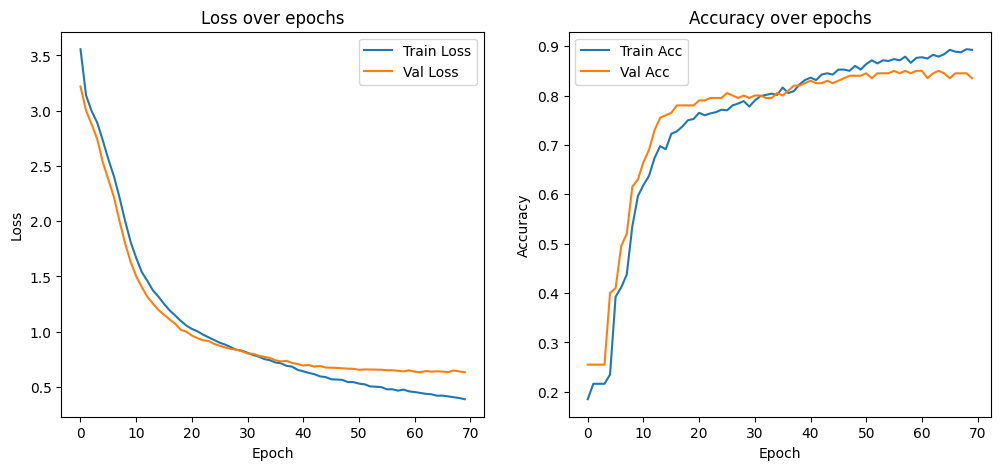

In [ ]:
import matplotlib.pyplot as plt


plt.figure(figsize=(12,5))

# График loss
plt.subplot(1,2,1)
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss over epochs')
plt.legend()

# График accuracy
plt.subplot(1,2,2)
plt.plot(train_accs, label='Train Acc')
plt.plot(val_accs, label='Val Acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy over epochs')
plt.legend()

plt.show()


# Вывод

## Вывод по лабораторной работе

В ходе выполнения лабораторной работы была реализована модель классификации текста на основе **Transformer**. Основные шаги работы:

### 1. Выбор и подготовка датасета
- Использован датасет [Shein Mens 1k Fashion Insights](https://www.kaggle.com/datasets/kanchana1990/shein-mens-1k-fashion-insights) с 1000 текстовыми описаниями продуктов и 15 категориальными признаками.
- Проведено разделение данных на тренировочную и валидационную выборки в соотношении 80/20.

### 2. Реализация компонентов Transformer
- **MultiHeadAttention**: собственная реализация многоголовой механики внимания.
- **PositionalEncoding (cosine)**: добавление информации о позиции слов в последовательности.
- **FeedForwardNetwork**: двухслойный полносвязный блок с ReLU активацией.
- **TransformerEncoderLayer** и **TransformerEncoder**: последовательное применение слоев внимания и feed-forward с residual connection и layer normalization.
- **TransformerClassifier**: добавление pooling и линейного классификатора для получения вероятностей классов.

### 3. Токенизация и подготовка данных
- Использован **BERT tokenizer** (`nlptown/bert-base-multilingual-uncased-sentiment`) для перевода текстов в последовательности индексов.
- Применён **truncation и padding** до длины `max_len = 130`.
- Данные преобразованы в `DataLoader` для обучения батчами.

### 4. Обучение модели
- Оптимизатор: **Adam**, функция потерь: **CrossEntropyLoss**.
- Количество эпох: **70**, batch size = 32.


### 5. Результаты обучения
- Точность на тренировочной выборке: **89%**
- Точность на валидационной выборке: **84%**
- Потери на тренировочной выборке: **0.3890**
- Потери на валидационной выборке: **0.6328**

### 6. Вывод

 - Модель корректно обучена и демонстрирует высокую точность на валидационной выборке.

 - Все компоненты Transformer были реализованы с нуля, без использования готовых эмбеддеров или слоёв внимания.


In [ ]:
# Сохраняем веса
torch.save(model.state_dict(), "text_model_weights.pth")

# Сохраняем токенайзер
tokenizer.save_pretrained("tokenizer_dir")

('tokenizer_dir/tokenizer_config.json',
 'tokenizer_dir/special_tokens_map.json',
 'tokenizer_dir/vocab.txt',
 'tokenizer_dir/added_tokens.json',
 'tokenizer_dir/tokenizer.json')